#   Bibliotecas

In [1]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack #utilizada para a junção de matrizes

In [2]:
#Pré processamento de colunas

from sklearn.model_selection import train_test_split #Divisão do dataset entre treino e teste
from sklearn.feature_extraction.text import TfidfVectorizer #vetorização do dataset
from sklearn.preprocessing import OneHotEncoder #aplicação de dummy

In [3]:
#Pré processamento de texto


import nltk
from nltk import word_tokenize #tokenizador
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords   #stopword

stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\angel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#import de funções do arquivo pre_processamento

from pre_processamento import pre_processamento, text_preprocess, textcolumns_junct,stemming

In [5]:
# Modelo a ser testado

from xgboost import XGBRegressor 

In [6]:
#metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [7]:
train = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\train.tsv", sep='\t')
test = pd.read_csv(r"C:\Users\angel\Desktop\bootcamp\test.tsv", sep='\t')

In [8]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [9]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [10]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [11]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [12]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
category_name          6314
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [13]:
train.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'item_condition_id'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'shipping'}>,
        <AxesSubplot:title={'center':'stock'}>],
       [<AxesSubplot:title={'center':'datetime_month'}>,
        <AxesSubplot:title={'center':'datetime_year'}>]], dtype=object)

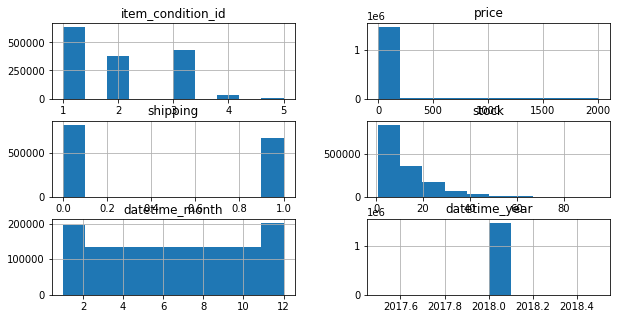

In [14]:
train.hist(figsize=(10,5))

In [15]:
X = train.drop("price", axis = 1)
y = train["price"]

In [16]:
X.shape

(1481661, 12)

#   Pré-processamento 

In [17]:
X = textcolumns_junct(X)

In [18]:
#Convertendo tudo para string

X["item_description"] = X["item_description"].astype(str)

In [19]:
X["item_description"] = X["item_description"].apply(lambda x: text_preprocess(x)) #Limpando texto com regex.


In [20]:
X["item_description"] = X["item_description"].apply(lambda x: word_tokenize(x)) #tokenizando

In [21]:
X["item_description"] = X["item_description"].apply(lambda x: stemming(x))

In [22]:
X["item_description"]=[" ".join(review) for review in X["item_description"].values]

In [23]:
X.head()

,item_condition_id,category_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,3,Men/Tops/T-shirts,1,mlb cincinnati red shirt size xl descript yet,27,Men,Tops,T-shirts,6.0,2018.0
1,3,Electronics/Computers & Tablets/Components & P...,0,razer blackwidow chroma keyboard razer keyboar...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,1,Women/Tops & Blouses/Blouse,1,ava viv blous target ador top hint lace key ho...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,1,Home/Home Décor/Home Décor Accents,1,leather hors statu new tag . leather hors . re...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,1,Women/Jewelry/Necklaces,0,24k gold plate rose complet certif authent,13,Women,Jewelry,Necklaces,5.0,2018.0


In [24]:
X["item_description"]

0              mlb cincinnati red shirt size xl descript yet
1          razer blackwidow chroma keyboard razer keyboar...
2          ava viv blous target ador top hint lace key ho...
3          leather hors statu new tag . leather hors . re...
4                 24k gold plate rose complet certif authent
                                 ...                        
1482530    free peopl inspir dress free peopl lace say si...
1482531    littl mermaid handmad dress disney littl merma...
1482532    21 day fix contain eat plan use twice still gr...
1482533    world market lantern 2 one see 2 red 2 orang 2...
1482534    brand new lux de vill wallet new tag red spark...
Name: item_description, Length: 1481661, dtype: object

#   Split

In [25]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10) #Divisão em 80/20

<AxesSubplot:>

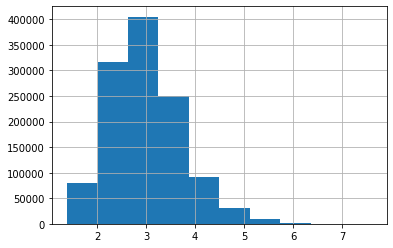

In [26]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain =  np.log1p(ytrain)
yval =  np.log1p(yval)
ytrain.hist()

# Transformadores

In [27]:
vec = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,2), max_features=100000) #vetorização, com stop word. 

In [28]:
vec_train = vec.fit_transform(Xtrain["item_description"])

vec_train

<1185328x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 34193726 stored elements in Compressed Sparse Row format>

In [29]:
vec_val = vec.transform(Xval["item_description"])

vec_val

<296333x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 8517546 stored elements in Compressed Sparse Row format>

In [30]:
ohe = OneHotEncoder(handle_unknown="ignore")

#aplicação dummy nas colunas categóricas.

ohe_train = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])
                            
ohe_train

<1185328x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 7111968 stored elements in Compressed Sparse Row format>

In [31]:
ohe_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

ohe_val

<296333x1008 sparse matrix of type '<class 'numpy.float64'>'
	with 1777987 stored elements in Compressed Sparse Row format>

In [33]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vec_train),
                 (ohe_train)
                 	
                                     ]) 
x_train

<1185328x101008 sparse matrix of type '<class 'numpy.float64'>'
	with 41305694 stored elements in Compressed Sparse Row format>

In [35]:
x_val = hstack([
                 (vec_val),
                 (ohe_val),
                             ]) 
x_val

<296333x101008 sparse matrix of type '<class 'numpy.float64'>'
	with 10295533 stored elements in Compressed Sparse Row format>

# Modelo

In [37]:
xgb = XGBRegressor(gpu_id = "0",
                   tree_method="gpu_hist",
                   random_state = 10
                   )

In [38]:
model = xgb.fit(x_train, ytrain)

In [39]:
ypredict = model.predict(x_val)

In [40]:
ypredict = np.expm1(ypredict)
yval =np.expm1(yval)

In [41]:
from sklearn.metrics import mean_squared_log_error

In [42]:
print('MAE: %2f' % mean_absolute_error(yval,ypredict))
print('RMSE: %2f' % (mean_squared_error(yval,ypredict)))
print('RMSLE: %2f' % mean_squared_log_error(yval,ypredict))


MAE: 11.836715
RMSE: 968.580088
RMSLE: 0.278757


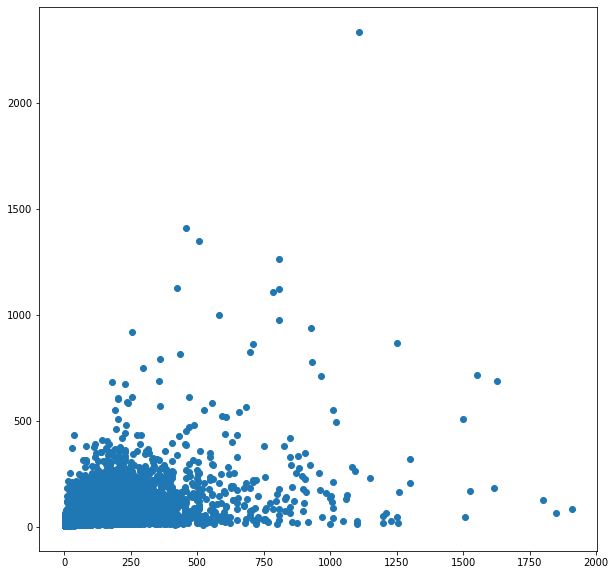

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=ypredict)